In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from masterthesis.utils import (
    heatmap, CEFR_LABELS, LANG_LABELS, load_split, IMG_DIR, MODEL_DIR, iso639_3, rescale_regression_results
)
from masterthesis.held_out_eval import load_model_and_w2i, get_input_reps
from masterthesis.models.report import report

import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.
 19%|█▊        | 23/123 [00:00<00:00, 228.25it/s]

Preprocessing split 'test' ...


100%|██████████| 123/123 [00:00<00:00, 359.60it/s]


In [3]:
model_path = MODEL_DIR / "rnn-multi-26805083_3_model.h5"

In [4]:
model, w2i = load_model_and_w2i(model_path)
multi_input = isinstance(model.input, list) and len(model.input) == 2

# Evaluation on test set

In [5]:
data = load_split("test", round_cefr=False)
data["isolang"] = data["lang"].replace(iso639_3)
lang_targets = np.array(
    [LANG_LABELS.index(c) for c in data["isolang"]], dtype=int
)
cefr_targets = np.array(
    [CEFR_LABELS.index(c) for c in data["cefr"]], dtype=int
)

In [6]:
multi_input = isinstance(model.input, list) and len(model.input) == 2

x = get_input_reps(w2i, multi_input, split="test")
predictions = model.predict(x)

100%|██████████| 123/123 [00:00<00:00, 1122.82it/s]

Preprocessing split 'test' ...


In [7]:
lang_predictions = predictions[1]
lang_pred = np.argmax(lang_predictions, axis=1)

cefr_predictions = predictions[0]
cefr_pred = rescale_regression_results(cefr_predictions, highest_class=6)

/home/stig/master-thesis/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/stig/master-thesis/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         A2       0.50      0.33      0.40         3
      A2/B1       0.47      0.47      0.47        19
         B1       0.42      0.43      0.43        23
      B1/B2       0.32      0.32      0.32        22
         B2       0.58      0.62      0.60        40
      B2/C1       0.23      0.33      0.27         9
         C1       0.00      0.00      0.00         7

avg / total       0.43      0.45      0.44       123

Macro F1: 0.356
Micro F1: 0.447
Weighted F1: 0.435
== Confusion matrix ==
[[ 1  2  0  0  0  0  0]
 [ 1  9  9  0  0  0  0]
 [ 0  6 10  5  2  0  0]
 [ 0  2  3  7  8  2  0]
 [ 0  0  2  9 25  4  0]
 [ 0  0  0  1  5  3  0]
 [ 0  0  0  0  3  4  0]]
             precision    recall  f1-score   support

        eng       0.15      0.50      0.24         8
        pol       0.40      0.18      0.25        22
        rus       0.50      0.25      0.33        16
        som       0.50      0.31      0.38        13
        spa

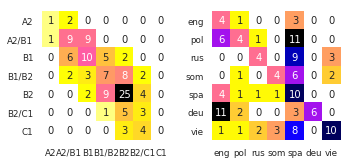

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)

report(cefr_targets, cefr_pred, CEFR_LABELS, ax=ax1)
report(lang_targets, lang_pred, LANG_LABELS, ax=ax2)
fig.set_size_inches(5, 2.5)
fig.tight_layout()
#plt.savefig(str(IMG_DIR / "multi-test-cm.pdf"), bbox_inches="tight")

# Evaluation on dev set

In [9]:
data = load_split("dev", round_cefr=False)
data["isolang"] = data["lang"].replace(iso639_3)
lang_targets = np.array(
    [LANG_LABELS.index(c) for c in data["isolang"]], dtype=int
)
cefr_targets = np.array(
    [CEFR_LABELS.index(c) for c in data["cefr"]], dtype=int
)

In [10]:
x = get_input_reps(w2i, multi_input, split="dev")
predictions = model.predict(x)

100%|██████████| 123/123 [00:00<00:00, 1223.63it/s]

Preprocessing split 'dev' ...


In [11]:
lang_predictions = predictions[1]
lang_pred = np.argmax(lang_predictions, axis=1)

cefr_predictions = predictions[0]
cefr_pred = rescale_regression_results(cefr_predictions, highest_class=6)

             precision    recall  f1-score   support

         A2       1.00      1.00      1.00         1
      A2/B1       0.50      0.41      0.45        22
         B1       0.29      0.35      0.32        20
      B1/B2       0.44      0.37      0.40        30
         B2       0.56      0.73      0.64        37
      B2/C1       0.43      0.30      0.35        10
         C1       0.00      0.00      0.00         3

avg / total       0.46      0.47      0.46       123

Macro F1: 0.451
Micro F1: 0.472
Weighted F1: 0.458
== Confusion matrix ==
[[ 1  0  0  0  0  0  0]
 [ 0  9 11  2  0  0  0]
 [ 0  8  7  3  2  0  0]
 [ 0  1  4 11 12  2  0]
 [ 0  0  1  8 27  1  0]
 [ 0  0  1  1  5  3  0]
 [ 0  0  0  0  2  1  0]]
             precision    recall  f1-score   support

        eng       0.55      0.67      0.60        18
        pol       0.57      0.43      0.49        30
        rus       0.50      0.18      0.26        17
        som       0.50      0.38      0.43         8
        spa

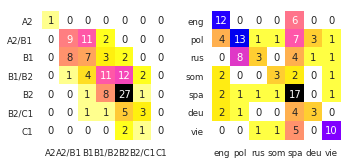

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)

report(cefr_targets, cefr_pred, CEFR_LABELS, ax=ax1)
report(lang_targets, lang_pred, LANG_LABELS, ax=ax2)
fig.set_size_inches(5, 2.5)
fig.tight_layout()
#plt.savefig(str(IMG_DIR / "multi-test-cm.pdf"), bbox_inches="tight")